Marie Klever 17.02.2021

# Kaggle

Kaggle: https://www.kaggle.com/

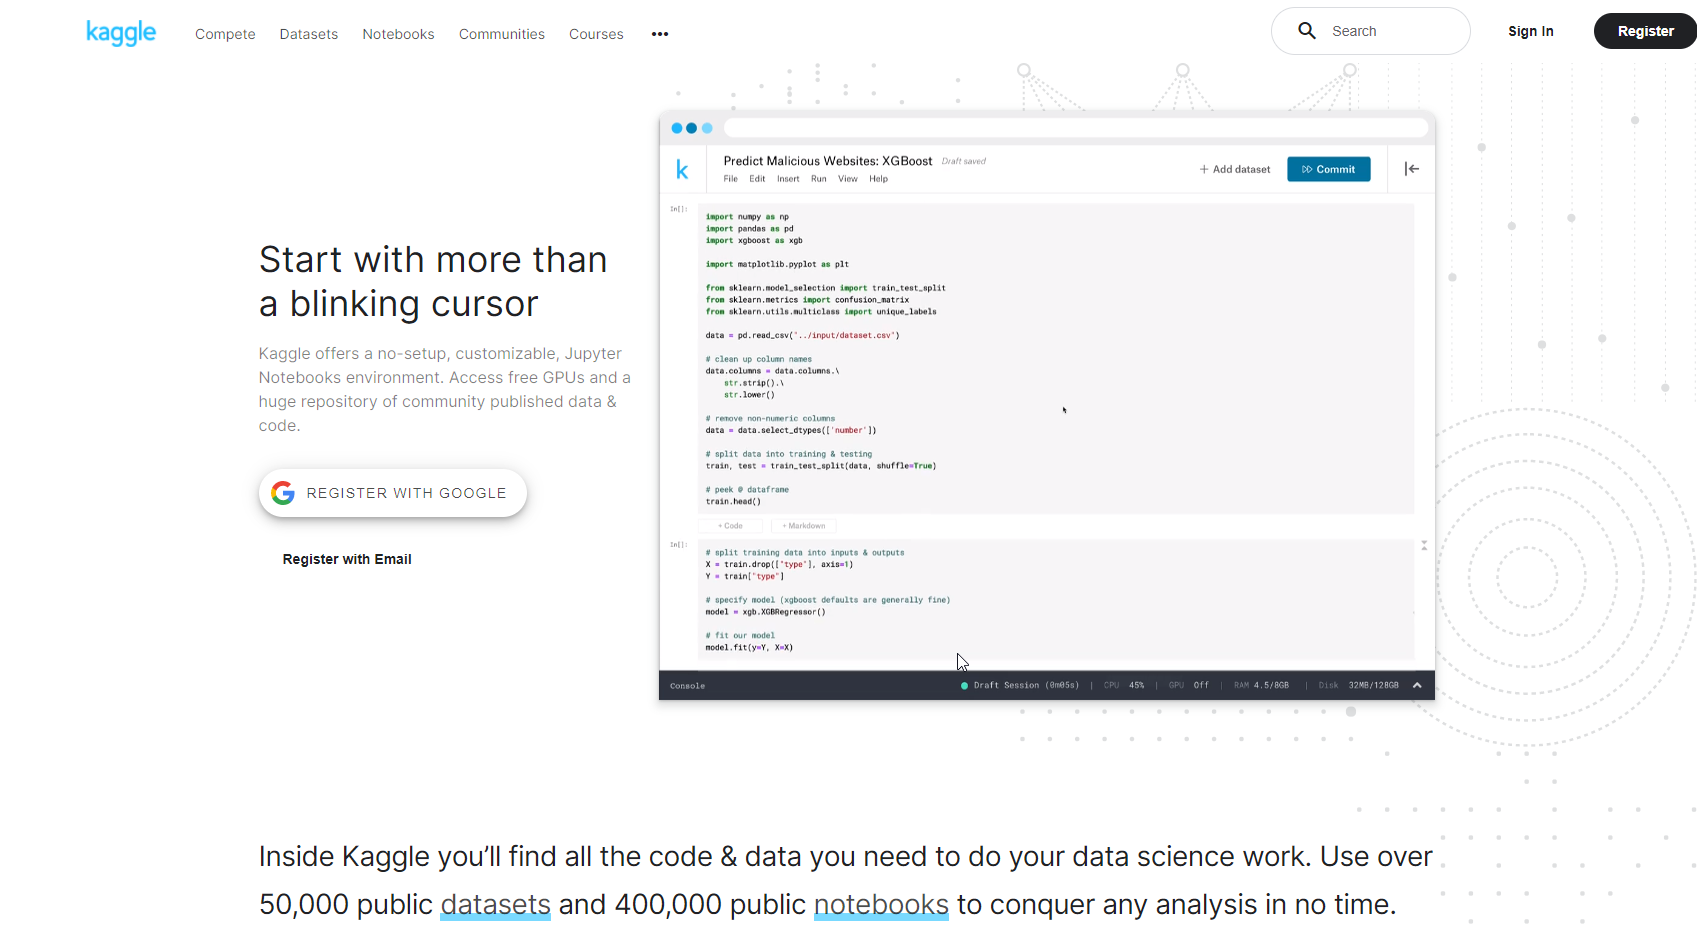

In [14]:
import IPython
IPython.display.Image("./ML_images/kaggle.png", width="100%")

Kaggle:
- Platform for å konkurrere i data sceience konkurranser (kompetativ maskinlæring)
- Har mange ulike dataset tilgjengelig som kan brukes som input til maskinlæringsmodeller
- Lære og trene på å bygge opp maskinlærings modeller

Ulike Kaggle konkurranser (dataset) for nybegynnere:
- Classification Problem: https://www.kaggle.com/c/titanic
- Regression Problem: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
- Computer Vision: https://www.kaggle.com/c/digit-recognizer
- Image Processing: https://www.kaggle.com/c/facial-keypoints-detection
- Natural Language Processing: https://www.kaggle.com/c/word2vec-nlp-tutorial


Kaggle "Intro to Machine Learning": https://www.kaggle.com/learn/intro-to-machine-learning

# Maskinlæring (ML) - kort introduksjon

>- Algoritmer som yter bedre etterhvert som de eksponeres for mer og mer data over tid
>- Algoritmer som lærer fra erfaringer .. og som kan utføre oppgaver uten at vi programmerer eksplisitte løsninger 

Nyttig om man står ovenfor kompliserte problemer der man ikke kan finne eller programmere explisitte løsninger. 

Maskinlæring sett i kontrast med programmering:

## Programmering vs maskinlæring

<b>Programmering</b>: Når et problem skal løses må det generelt gjøres to ting:
    1. Finne en oppskrift som vil løse problemet
    2. Implementere oppskriften som et program

Altå; vi må selv finne et set med regler som maskinen kan følge  før maskinen kan ta i mot data og komme fram til et svar

<b>Maskinlæring</b>: I steden for å finne et set med regler, så gir en heller maskinen en haug med data og svar, og så finner den selv fram til regler som kan brukes til å finne løsninger.

In [15]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='./ML_images/programmering.png'></td><td><img src='./ML_images/ml_picture.png'></td></tr></table>"))

,


## Hvordan lærer maskinen

Maskinen finner fram til disse reglene ved å lære av dataen og svarene som puttes inn i den. Og hvordan maskinen lærer er likt som hvordan vi lærer.

<b>Kan bruke hunderaser som et eksempel </b>: Vi ser på hunderaser og skal lære oss forskjellen på ulike hunderaser, slik at vi kan gjenkjenne bilder av nye hunder.

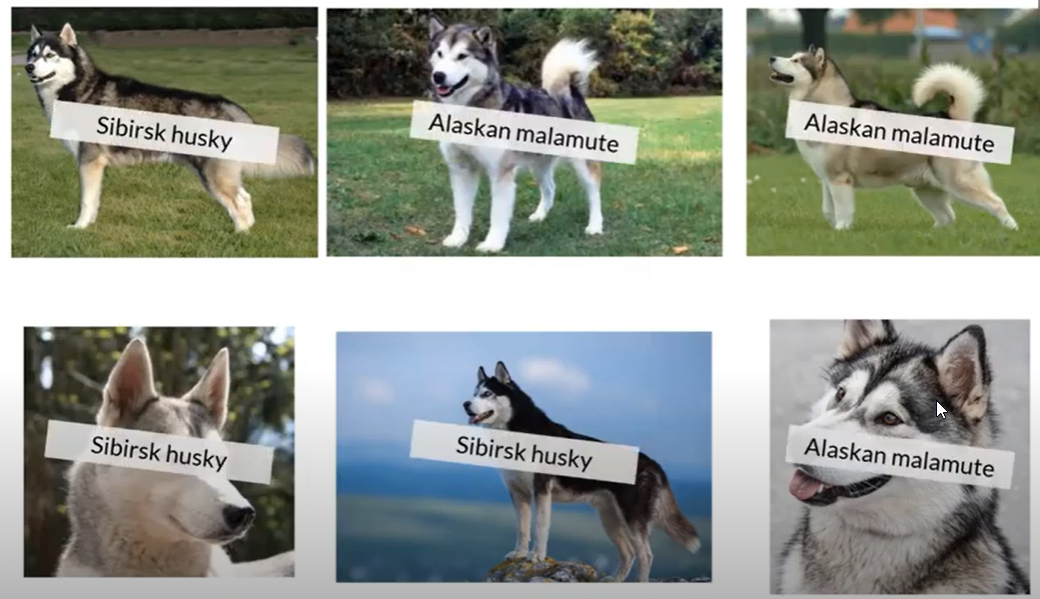

In [16]:
IPython.display.Image("./ML_images/dogs_fasit.png", width="100%")

For å lære seg hvordan en kan kjenne igjen hunderasen til en hund, så kan en lage seg et sett med beskrivelser av de to hunderasene, og bruke dette til å avgjøre hvilken hunderase en hund tilhører. Det vil si et sett med beskrivende <b>features</b>.

Disse features kan brukes til å avgjøre hva man ser i et bilde, altså lære å tolke bildene.

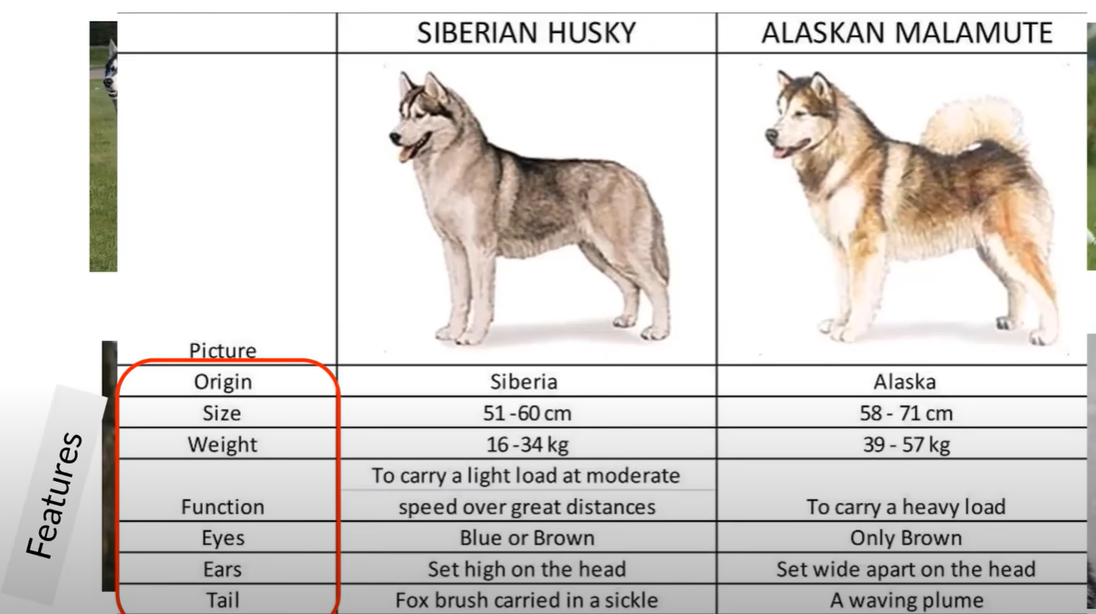

In [18]:
IPython.display.Image("./ML_images/dogs_descriptions.png", width="100%")

>Man kan trene opp seg selv (og maskiner) til å utføre klassifikasjonsoppgaver (som dette) ved å bruke features (representasjoner) av data.

# ML rammeverket

Importerer standard python biblioteker som skal brukes.

In [82]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [20]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

Bibilotek med maskinlærings algoritmer `scikit-learn` brukes mye:

In [22]:
import sklearn

# Maskinlærings prosjekt - framgangsmåte

Det er en rekke steg som går igjen i omtrent alle prosjekter basert på maskinlæring. Under har jeg listet opp en litt forenklet versjon av disse stegene.

# 1. Last, utforsk og forbered dataen

Mål: lage en maskinlærings modell som kan predikere om en person kommer til å dø eller ikke på Titanic

## Last inn og analyserer dataen

Datasettet som brukes hentes fra Kaggle: https://www.kaggle.com/c/titanic/overview

In [239]:
#Last ned data fra Kaggle for Titanic konkurransen (Titanic datasettet)
!kaggle competitions download -c titanic -p C:/Users/mak/Desktop/ML/dataset

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [240]:
#Unzip filen som er lastet ned
import zipfile
with zipfile.ZipFile('./dataset/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('./dataset')

In [241]:
dataset = pd.read_csv('./dataset/train.csv')
kaggle_test = pd.read_csv('./dataset/test.csv')

### Analyserer datasettet

In [242]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


En linje (rad) i datasettet representerer en pasasjer på Titanic, hvor pasasjeren er beskrevet ved hjelp av ulike features. Kolonnen `Survived` er fasiten som sier om pasasjeren overlevde eller ikke.

In [243]:
len(dataset)

891

Ser at datasettet har 12 features og en target kolonne `Survived` (fasiten).

Ulike av featurene har ulike datatyper.

In [244]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [245]:
#Kan se på mer detaljert informasjon for de numeriske featurene
dataset.describe(include="number").round(0)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


In [247]:
#Kan se på statistikk for de kategoriske featurene
dataset.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bazzani, Miss. Albina",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [248]:
#Ser etter manglende data (NaN) verdier i datasettet
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Beskrivelse av hvert feature fra Kaggle:

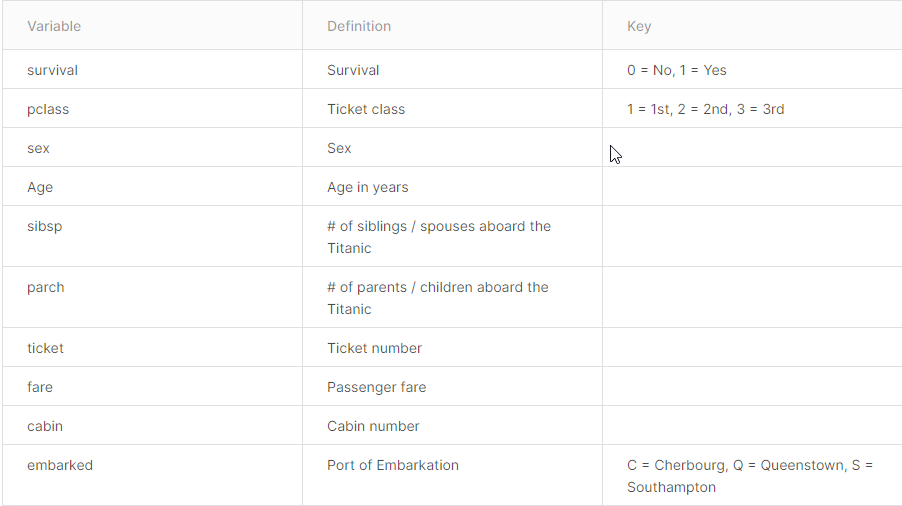

In [249]:
IPython.display.Image("./ML_images/titanic_features.png", width="90%")

## Visualiser dataen

Det er viktig og spennende å utforske datasettet før man begynner med modelleringen av madkinlærings modellen. Det finnes flere ulike måter å visualisere daten på, både gjennom <b>histogrammer</b> og <b>scatterplots</b>.

Man kan se på en spesifikk feature, eller måle ulike features opp mot hverandre.

Vi kan visualisere koblingen mellom ulike features i et scatter plot, hvor hver rad i datasettet er farget etter om passasjeren overlevde eller ikke.

In [91]:
#Scatterplot kan brukes for å sammenligne numeriske features
#pd.plotting.scatter_matrix(dataset.select_dtypes(include=['float64', 'int64']), c=dataset['Survived'], figsize=(15,15), marker='o', s=60)
#plt.show()

Text(0.5, 1.0, 'Embarked')

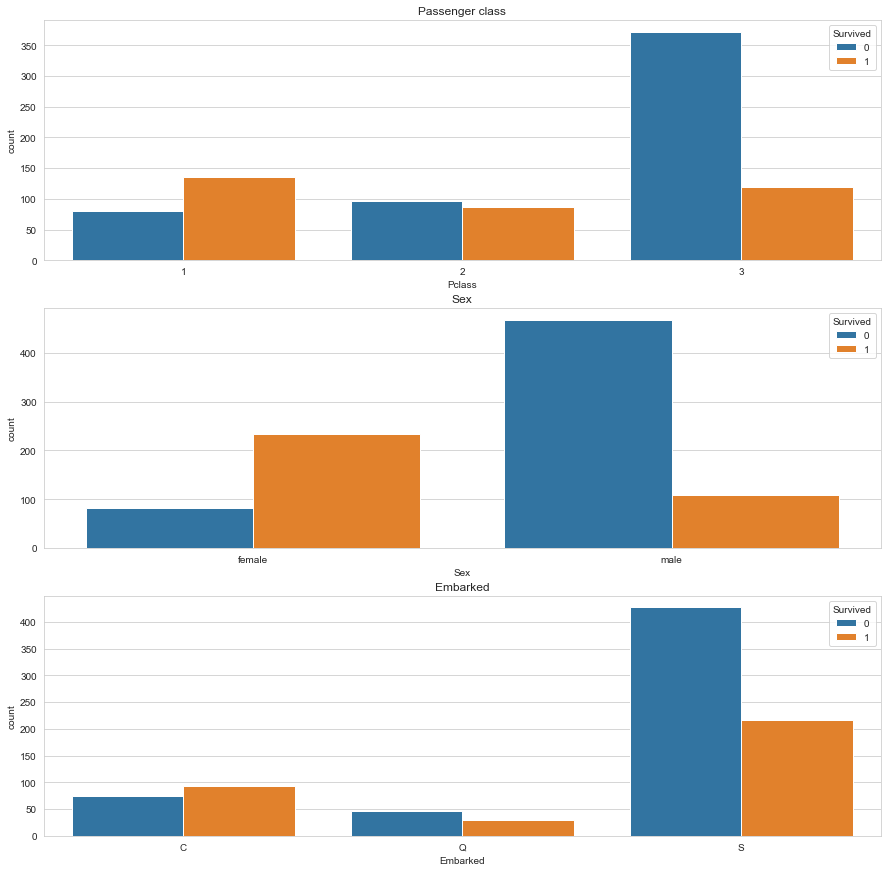

In [100]:
f1, axes = plt.subplots(3, figsize=(15, 15))

sns.countplot(x="Pclass", hue="Survived", data=dataset, ax=axes[0]).set_title("Passenger class")
sns.countplot(x="Sex", hue="Survived", data=dataset, ax=axes[1]).set_title("Sex")
sns.countplot(x="Embarked", hue="Survived", data=dataset, ax=axes[2]).set_title("Embarked")

#Survived: 0=No, 1=Yes

Når man ser visuelt på dataen og featurene, kan man finne mønster i dataen som vi kan bruke når vi bygger opp maskinlærings modellen.

## Prosessere dataen / feature engineering

I denne delen gjøres følgende på datasettet:
- NaN verdier fylles inn
- Enkoder kategoriske/objekt features til numeriske verdier
- Nye features legges til
- Features som ikke trengs slettes
- Hvilke features som skal brukes bestemmes

Her brukes det man har funnet gjennom analyse og visualisering av data til å prosessere dataen og designe de faktiske features som man skal mate inn i ML algoritmen. Detter er typisk mye arbeid, faktisk mesteparten av arbeidet i et ML prosjekt. For jo bedre representasjon av data, jo lettere blir det for ML modellen.

In [250]:
dataset_copy = dataset.copy()

dataset_tot = dataset_copy.append(kaggle_test.copy(), ignore_index=True)

#Endrer til kategorisk datatype, da disse features ikke er numeriske men kategoriske
dataset_tot["Sex"] = dataset_tot["Sex"].astype("category")
dataset_tot["Embarked"] = dataset_tot["Embarked"].astype("category")
dataset_tot["Pclass"] = dataset_tot["Pclass"].astype("category")

survived_feature = dataset_tot['Survived']
del dataset_tot['Survived']

#add train and test dataset together to do the same preprocessing on both

### Fyller inn NaN verdier

In [251]:
dataset_tot.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

In [252]:
# Missing ages: the median age value for their gender and pclass (evt. median age for the title)
# Group data by sex, pclass
grouped = dataset_tot.groupby(["Sex","Pclass"])
dataset_tot.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))
    
# Missing Embarked: most occured value
dataset_tot.Embarked = dataset_tot.Embarked.fillna(dataset_tot.Embarked.mode()[0])

# Missing Cabin: applying 0 for missing cabin and 1 for cabin
dataset_tot.Cabin = dataset_tot.Cabin.apply(lambda x: 0 if type(x) == float else 1)    
   
# Missing Fare: median value
dataset_tot.Fare = dataset_tot.Fare.fillna(dataset.Fare.median()) 

In [253]:
dataset_tot.isnull().sum()

Age            0
Cabin          0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Ticket         0
dtype: int64

### Legger til nye features

In [254]:
# Title feature: adding title feature and remove name ("Mr", "Miss", "Mrs", "Master", "Officer", "Adel")
dataset_tot["Title"] = dataset_tot.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
print(dataset_tot.Title.value_counts())

dataset_tot.Title = dataset_tot.Title.replace(["Capt", "Col", "Major", "Dr", "Rev"], "Officer")
dataset_tot.Title = dataset_tot.Title.replace(["Jonkheer", "Don", "Sir", "Countess", "Dona", "Lady"], "Adel")
dataset_tot.Title = dataset_tot.Title.replace(["Mlle", "Ms"], "Miss")
dataset_tot.Title = dataset_tot.Title.replace(["Mme"], "Mrs")

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Countess      1
Don           1
Mme           1
Capt          1
Dona          1
Sir           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64


### Fjerner features som ikke trengs

In [255]:
#Navn gir lite informasjon og fjernes derfor 
del dataset_tot['Name']

#Ticket gir også lite informasjon og fjernes
del dataset_tot['Ticket']

### Enkoder kategoriske/objekt verdier til numeriske verdier

Lager en numerisk representasjon av features som er av typen objekt/kategori.

In [256]:
dataset_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null category
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null category
Sex            1309 non-null category
SibSp          1309 non-null int64
Title          1309 non-null object
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 75.8+ KB


In [257]:
# 6 numeriske features
dataset_num = dataset_tot.select_dtypes(include=["int64", "float64"])
dataset_num.head()

,Age,Cabin,Fare,Parch,PassengerId,SibSp
0,22.0,0,7.2500,0,1,1
1,38.0,1,71.2833,0,2,1
2,26.0,0,7.9250,0,3,0
3,35.0,1,53.1000,0,4,1
4,35.0,0,8.0500,0,5,0


In [258]:
# 5 categorical features
dataset_cat = dataset_tot.select_dtypes(include=["category", "object"])
dataset_cat.head()

,Embarked,Pclass,Sex,Title
0,S,3,male,Mr
1,C,1,female,Mrs
2,S,3,female,Miss
3,S,1,female,Mrs
4,S,3,male,Mr


In [259]:
dataset_cat_encoded = pd.get_dummies(dataset_cat, drop_first=True)
dataset_tot = dataset_num.join(dataset_cat_encoded)
dataset_tot = dataset_tot.join(survived_feature)
dataset_tot.head()

,Age,Cabin,Fare,Parch,PassengerId,SibSp,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Survived
0,22.0,0,7.2500,0,1,1,0,1,0,1,1,0,0,1,0,0,0.0
1,38.0,1,71.2833,0,2,1,0,0,0,0,0,0,0,0,1,0,1.0
2,26.0,0,7.9250,0,3,0,0,1,0,1,0,0,1,0,0,0,1.0
3,35.0,1,53.1000,0,4,1,0,1,0,0,0,0,0,0,1,0,1.0
4,35.0,0,8.0500,0,5,0,0,1,0,1,1,0,0,1,0,0,0.0


### Velge ut features

Å velge en avgrenset mengde features kan gi en bedre ytelse for maskinlæringsmodellen. Det finens flere ulike metoder for å velge ut features som skal brukes. Hvilke features en trent maskinlæringsmodell anser som viktige kan vi også finne ut av etter vi har trent modellen for første gang.

Jeg bruker bare alle features som jeg har i `dataset_tot`.

# 2. Split i trenings og test data

Det er viktig at ML modellen generaliserer til ny data som kommer inn. Dermed må modellen trenes på en slik måte at vi kan forvente at den også virker på ny, usett data.

Dette kan oppnås ved å dele opp datasettet vi har i to deler:
- <b> Trenings dataset </b>: brukes når modellen bygges for å trene den opp.
- <b> Test dataset </b>: Brukes etter modellen er ferdig trent for å sjekke om den faktisk fungerer på usett data. Siden test dataen har en fasit, kan vi bruke den til å måle hvor godt modellen gjør det.

Det settes tilside 25% av dataen som test data.

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
kaggle_test_index = dataset_tot.Survived.isnull()

kaggle_test = dataset_tot[kaggle_test_index].drop("Survived", axis=1)

X = dataset_tot[~kaggle_test_index].drop("Survived", axis=1)
y = dataset_tot[~kaggle_test_index]["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [262]:
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')

Training data: (668, 16)
Test data: (223, 16)


# 3. Bygg maskinlæringsmodellen

Velgi overfladisk; bruker en utvalgt modell uten å snakke om hvordan den fungerer. I dette tilfellet brukes jeg en RandomForestClassifier modell.

Det er mange ulike modeller som kan brukes.

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
#Oppretter en instans av modellen og bruker bare default parameterne som kommer med modellen
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state for reproducibility

Etter modellen er opprettet, trenes den på treningsdata ved å kalle metoden <b>fit</b>. Alle klassifikasjonmodeller i scikit-learn (som RandomForestClassifier) kommer med metodene <b>fit</b> og <b>predict</b>:
- <b>fit</b>: brukes til å tilpasse modellen til dataen (trene modellen)
- <b>predict</b>: brukes til å predikere

In [265]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

ML modellen `RandomForestClassifier` har en haug med parametere som vi nå bare har valgt å bruke default verdien til. Disse parameterene kan spesifiseres (endres) for å oppnå bedre ytelse for ML modellen (dette kalles <b>parameter tuning</b>)

In [266]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# 4. Evaluer modellen

Etter modellen er trent opp på trenings datasettet kan vi test hvor godt den yter ved å predikere på test datasettet. Da predikerer modellen hva den tror fasiten skal være for test dataen (altså om pasasjeren overlevde eller ikke).

Siden test datasettet har en fasit (kolonnen `Survived`), så kan vi sammenligne modellens prediksjon med fasiten og dermed få et mål på hvor bra modellen yter.

Det finnes flere ulike mål på ytelse, men her brukes Accuracy.

In [267]:
y_pred = rf.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score

In [269]:
accuracy_score(y_test, y_pred)

0.8340807174887892

Vi kan se at modellen vår får en score på 83%, som vil si at den klarer å predikere korrekt resultat i 83% av tilfellene. 

Om ytelsen er bra eller dårlig kommer an på hva modellen skal brukes til.

# Send inn til Kaggle konkurransen

Nå brukes datasettet `kaggle_test` (lastet inn fra csv filene train.csv) til å gjøre en ny prediksjon med vår opptrente modell. Dette datasettet har ingen fasit (til forskjell fra test datasettet vårt), men Kaggle har denne fasiten. Dermed bruker vi dette datasettet til å gjøre en predikasjon på, og så laster vi denne predikasjonen opp i Kaggle konkurransen. Der får vi svar på hvor bra modellen vår har gjort det.

In [270]:
kaggle_test.head()

,Age,Cabin,Fare,Parch,PassengerId,SibSp,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer
891,34.5,0,7.8292,0,892,0,1,0,0,1,1,0,0,1,0,0
892,47.0,0,7.0000,0,893,1,0,1,0,1,0,0,0,0,1,0
893,62.0,0,9.6875,0,894,0,1,0,1,0,1,0,0,1,0,0
894,27.0,0,8.6625,0,895,0,0,1,0,1,1,0,0,1,0,0
895,22.0,0,12.2875,1,896,1,0,1,0,1,0,0,0,0,1,0


In [275]:
kaggle_pred = rf.predict(kaggle_test)

submission = pd.DataFrame()
submission["PassengerId"] = kaggle_test["PassengerId"].to_numpy()
submission["Survived"] = kaggle_pred.astype(int)

In [276]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [277]:
submission.to_csv("submission.csv",index=False)

In [278]:
!kaggle competitions submit -c titanic -f submission.csv -m "Submission corrected type"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 31.4kB/s]


# Forstå modellen og dens prediksjoner

En viktig del av å bygge opp gode ML modeller er å undersøke hva modellen har lært, hvordan den vektlegger ulike features, vhordan den reagerer om vi endrer p noen features osv. Dette er nyttig både for å forbedre modellen, og forstå modellens besluttelseslogikk (hvilke regler modellen lager seg). Har man oversikt over dette kan man avgjøre om man stoler på modellen eller ikke, og i hvilke tilfeller den kan brukes.

Det finnes ulike metoder for å se på hvilke feature som er mest/minst viktig i modellen. Og hva som er forholdet mellom de ulike featurene.

Denne informasjonen kan brukes til å optimalisere algoritmen, da vi kan velge å bare ta med de features som modellen vektlegger høyest.

## Permutation importance

Foreta en tilfeldig permutasjon av feature verdier. Det velges da en feature, og så shuffles verdiene til alle radene tilfeldig mellom radene (bytter verdier internt mellom radene i datasettet). 

Ideen er at dersom en feature er viktig for den trente modelle, så vil effekten av å shuffle denne featuren være stor of negativ (modellen vil yte dårligere). Om en feature ikke er viktig, vil en shufling av denne ikke ha stor effekt på modellen.

In [202]:
import eli5
from eli5.sklearn import PermutationImportance

In [203]:
perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)

Bruker et python bibliotek for å gjøre dette.
Det gjøres for hver feature, og verdiene i hver feature shuffles 5 ganger. Deretter ser vi i resultatet hvilke features som har størst påvirkning på modellen.

In [204]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0296 ± 0.0122,Fare
0.0260 ± 0.0154,Sex_male
0.0260 ± 0.0183,Pclass_3
0.0188 ± 0.0262,Title_Mr
0.0143 ± 0.0119,PassengerId
0.0117 ± 0.0166,Cabin
0.0108 ± 0.0044,Title_Master
0.0090 ± 0.0057,SibSp
0.0090 ± 0.0000,Embarked_Q
0.0009 ± 0.0036,Title_Officer


Negative verdier betyr at modellen i snitt faktisk ble litt bedre når vi shuflet verdien i disse featurene.

## Partial dependence plot

Over så ser vi at `Fare` er viktig for modellen, men er det en høy Fare eller en lav Fare som forteller modellen noe om pasasjeren vil overleve eller ikke. Om hva med kombinasjoner av ulike features? Partial dependence plot gir svaret på dette.

Ideen er at man øker verdien av en feature, mens de andre holdes konstant. Da kan man se på effekten en feature har på modellens predikajsonsevne.

PDP is another useful way to understand and explain predictions made by machine learning algorithms.

The idea is to plot predictions while increasing a specified feature. For example, what happens to the predicted probability for diabetes as the glucose level increases? As this is an important feature we expect it to change quite a bit (in fact, since we're talking about diabetes we expect the probability to increase). And what about unimportant features like age? 

We can use the `PDPbox` library, which is compatible with scikit-learn (see https://pdpbox.readthedocs.io/en/latest for details):

In [206]:
from pdpbox import pdp

In [207]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='Fare')

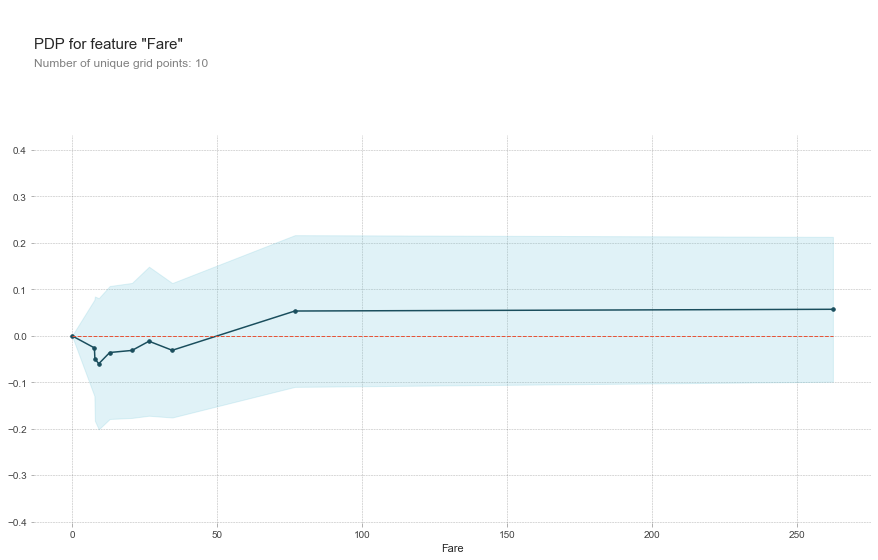

In [208]:
pdp.pdp_plot(pdp_goals, 'Fare')
plt.show()

### To dimensjonal PDP

Kan kombinere flere features samtidig og se på interaksjonen mellom de.